In [1]:
import sunpy
import sunpy.map
import astropy
import astropy.units as u
import astropy.constants as const
from astropy.visualization import ImageNormalize, AsinhStretch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)

In [26]:
phi_los_map = sunpy.map.Map('../../src/coalign_map/20221024/phi_los_map_shifted.fits')

In [3]:
hri_174_map = sunpy.map.Map('../../src/coalign_map/20221024/hri_174_map_shifted_toaia.fits')

In [27]:
phi_los_map_hri_fov = phi_los_map.reproject_to(hri_174_map.wcs)
phi_los_map_hri_fov.plot_settings['cmap'] = 'hmimag'
phi_los_map_hri_fov.plot_settings['norm'] = ImageNormalize(vmin=-1000,vmax=1000)

In [7]:
Txshift_phi, Tyshift_phi = -7.56808*u.arcsec, -67.6155*u.arcsec

In [45]:
phi_binc_map = sunpy.map.Map('../../src/PHI/20221024/solo_L2_phi-hrt-binc_20221024T191503_V01.fits').shift_reference_coord(Txshift_phi, Tyshift_phi)
phi_binc_map.meta["rsun_ref"] = hri_174_map.meta["rsun_ref"]
phi_binc_map_hri_fov = phi_binc_map.reproject_to(hri_174_map.wcs)
phi_binc_map_hri_fov.plot_settings['cmap'] = 'twilight_shifted'
phi_binc_map_hri_fov.plot_settings['norm'] = ImageNormalize(vmin=0,vmax=180)
phi_bazi_map = sunpy.map.Map('../../src/PHI/20221024/solo_L2_phi-hrt-bazi_20221024T191503_V01.fits').shift_reference_coord(Txshift_phi, Tyshift_phi)
phi_bazi_map.meta["rsun_ref"] = hri_174_map.meta["rsun_ref"]
phi_bazi_map_hri_fov = phi_bazi_map.reproject_to(hri_174_map.wcs)
phi_bazi_map_hri_fov.plot_settings['cmap'] = 'twilight'
phi_bazi_map_hri_fov.plot_settings['norm'] = ImageNormalize(vmin=0,vmax=180)

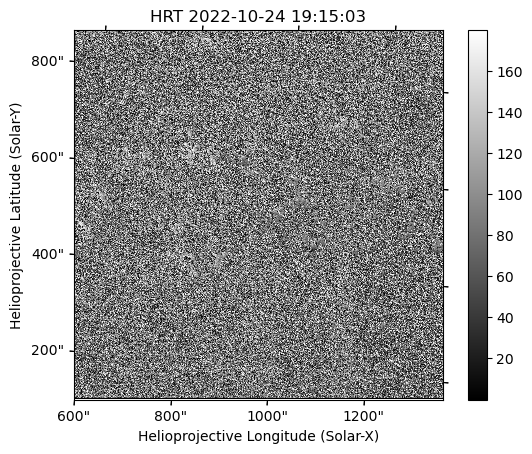

In [46]:
phi_bazi_map.plot()
plt.colorbar()

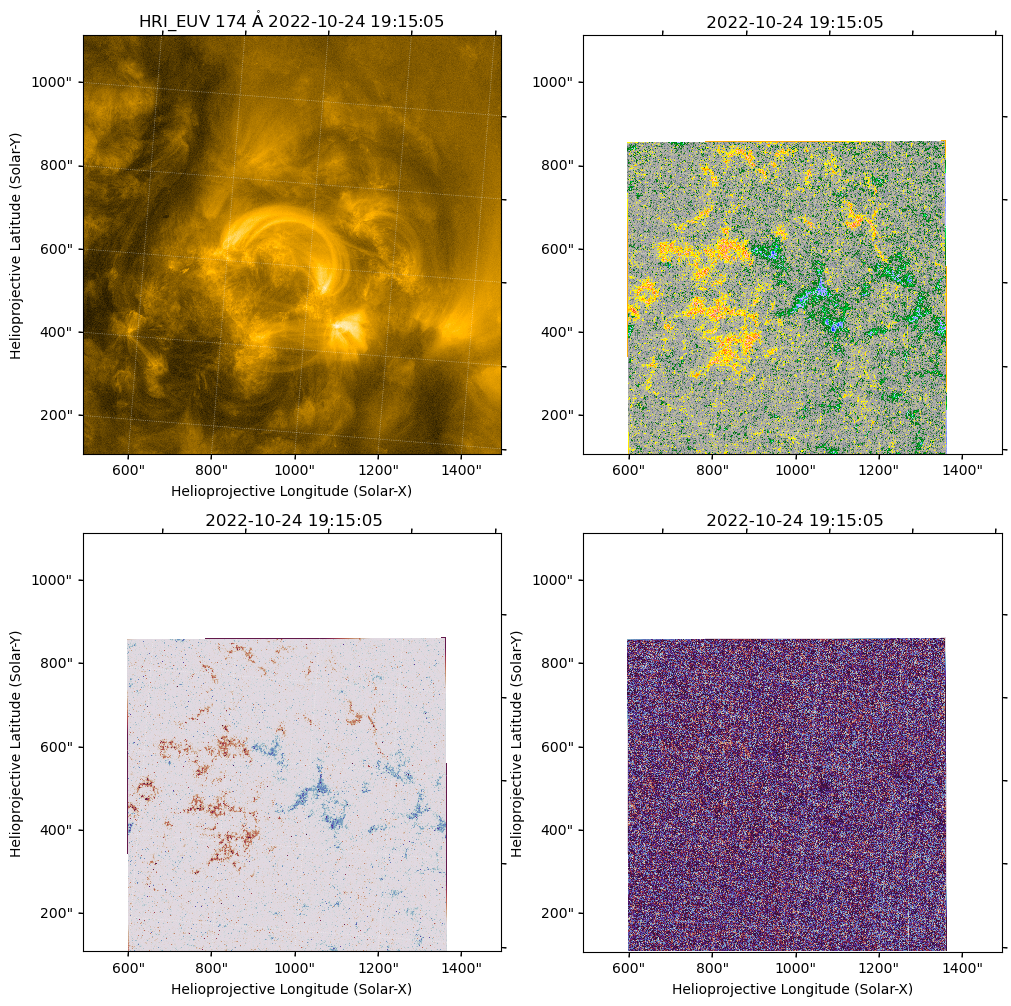

In [48]:
fig = plt.figure(figsize=(10, 10),layout='constrained')

ax1 = fig.add_subplot(221, projection=hri_174_map)
ax2 = fig.add_subplot(222, projection=hri_174_map)
ax3 = fig.add_subplot(223, projection=hri_174_map)
ax4 = fig.add_subplot(224, projection=hri_174_map)

hri_174_map.plot(axes=ax1)
phi_los_map_hri_fov.plot(axes=ax2,)
phi_binc_map_hri_fov.plot(axes=ax3)
phi_bazi_map_hri_fov.plot(axes=ax4)

ax2.set_ylabel(' ')
ax2.set_xlabel(' ')




In [49]:
def plot_regions(maps, bottom_left, top_right):
    sub_maps = []

    for map_ in maps:
        sub_map_ = map_.submap(bottom_left, top_right=top_right)
        sub_maps.append(sub_map_)
    
    fig = plt.figure(figsize=(10, 12),layout='constrained')

    ax1 = fig.add_subplot(221, projection=sub_maps[0])
    ax2 = fig.add_subplot(222, projection=sub_maps[1])
    ax3 = fig.add_subplot(223, projection=sub_maps[2])
    ax4 = fig.add_subplot(224, projection=sub_maps[3])

    sub_maps[0].plot(axes=ax1,interpolation="none")
    sub_maps[1].plot(axes=ax2,interpolation="none")
    sub_maps[2].plot(axes=ax3,interpolation="none")
    sub_maps[3].plot(axes=ax4,interpolation="none")

    plt.colorbar(ax1.images[0], ax=ax1, orientation='horizontal', label='Intensity [DN/s]')
    plt.colorbar(ax2.images[0], ax=ax2, orientation='horizontal', label='Blos [G]')
    plt.colorbar(ax3.images[0], ax=ax3, orientation='horizontal', label='Binc [deg]')
    plt.colorbar(ax4.images[0], ax=ax4, orientation='horizontal', label='Bazi [deg]')


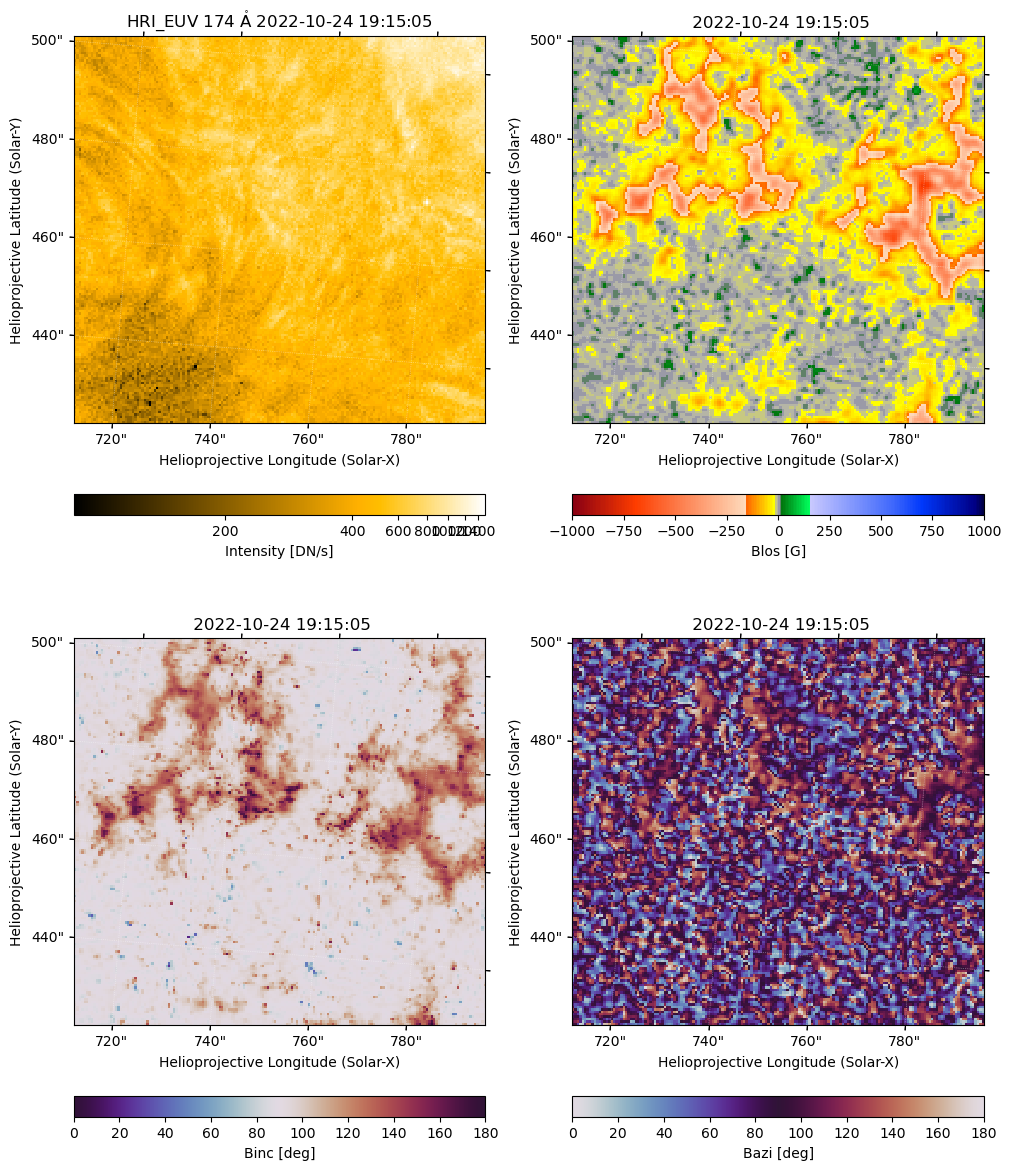

In [50]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [500, 600]*u.pix, top_right = [670, 760]*u.pix)

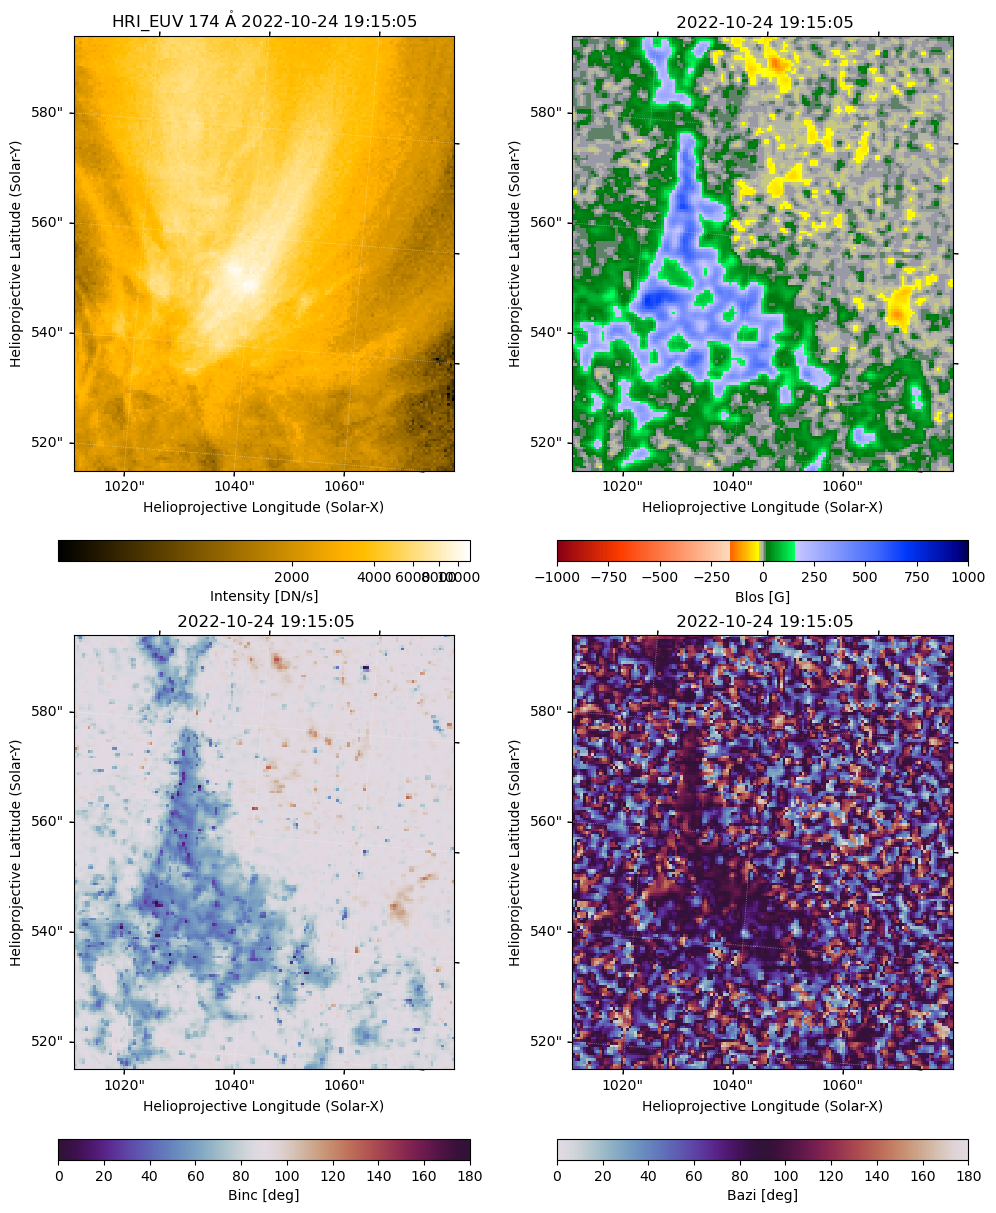

In [51]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [1120, 740]*u.pix, top_right = [1260, 900]*u.pix)

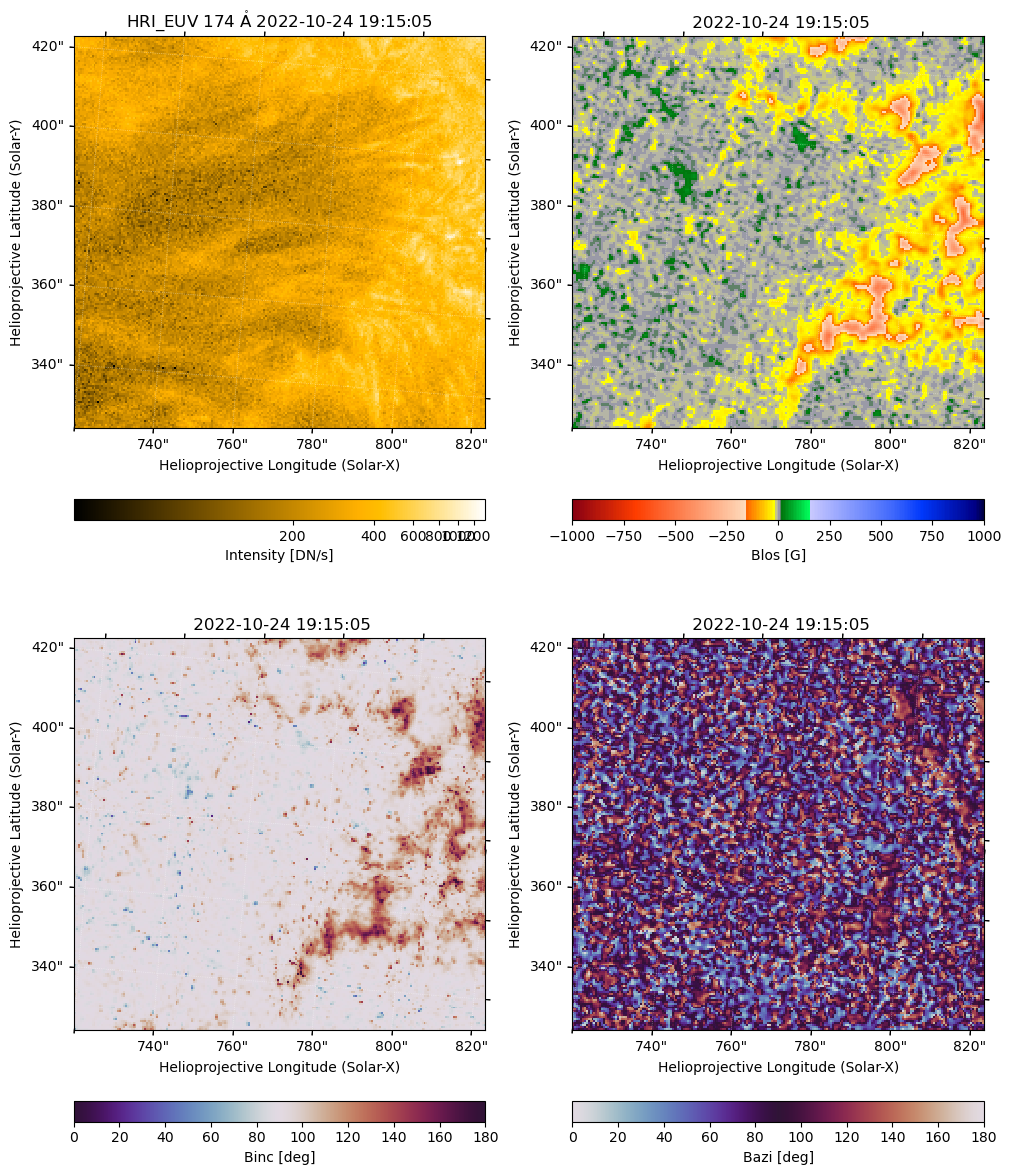

In [52]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [500, 400]*u.pix, top_right = [710, 600]*u.pix)

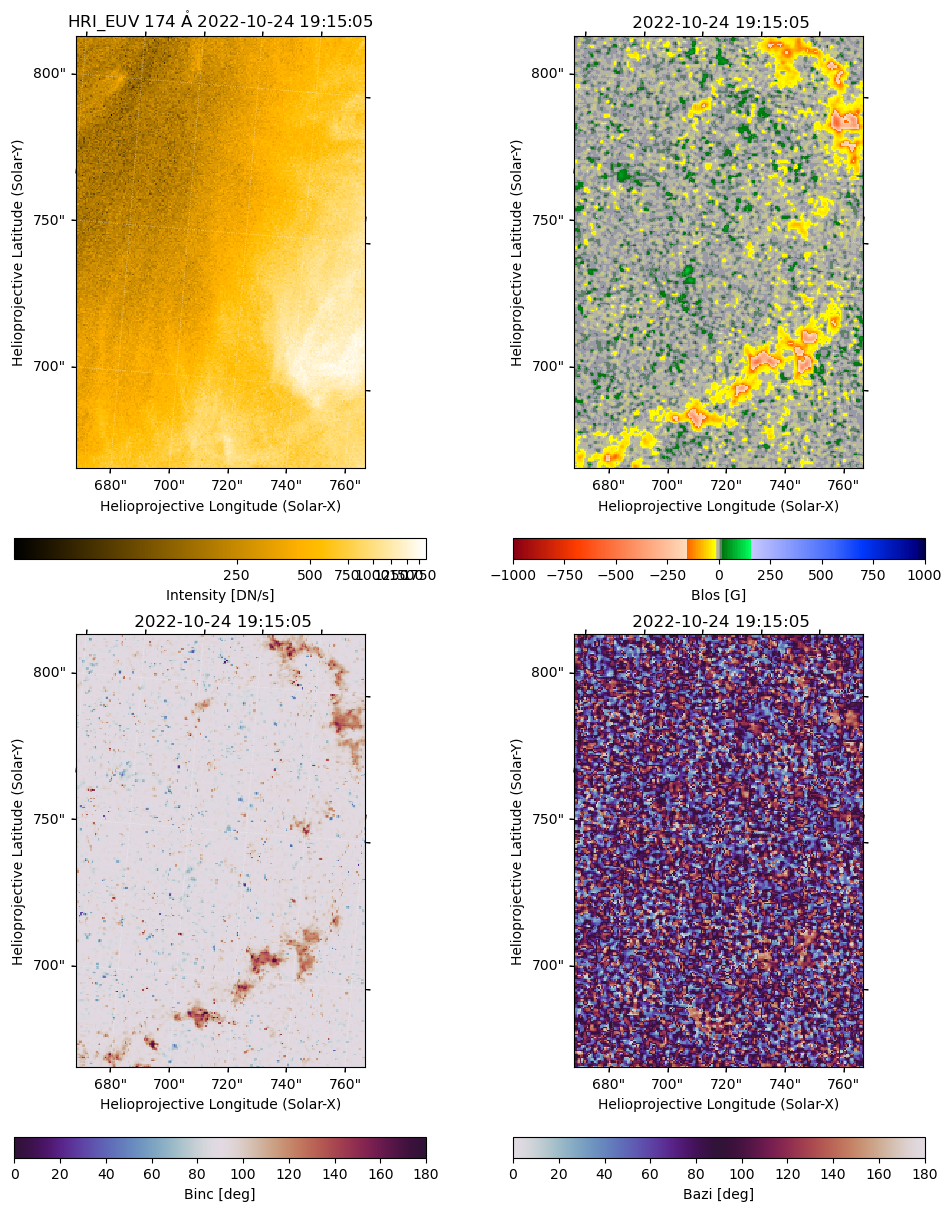

In [53]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [450, 1100]*u.pix, top_right = [650, 1400]*u.pix)

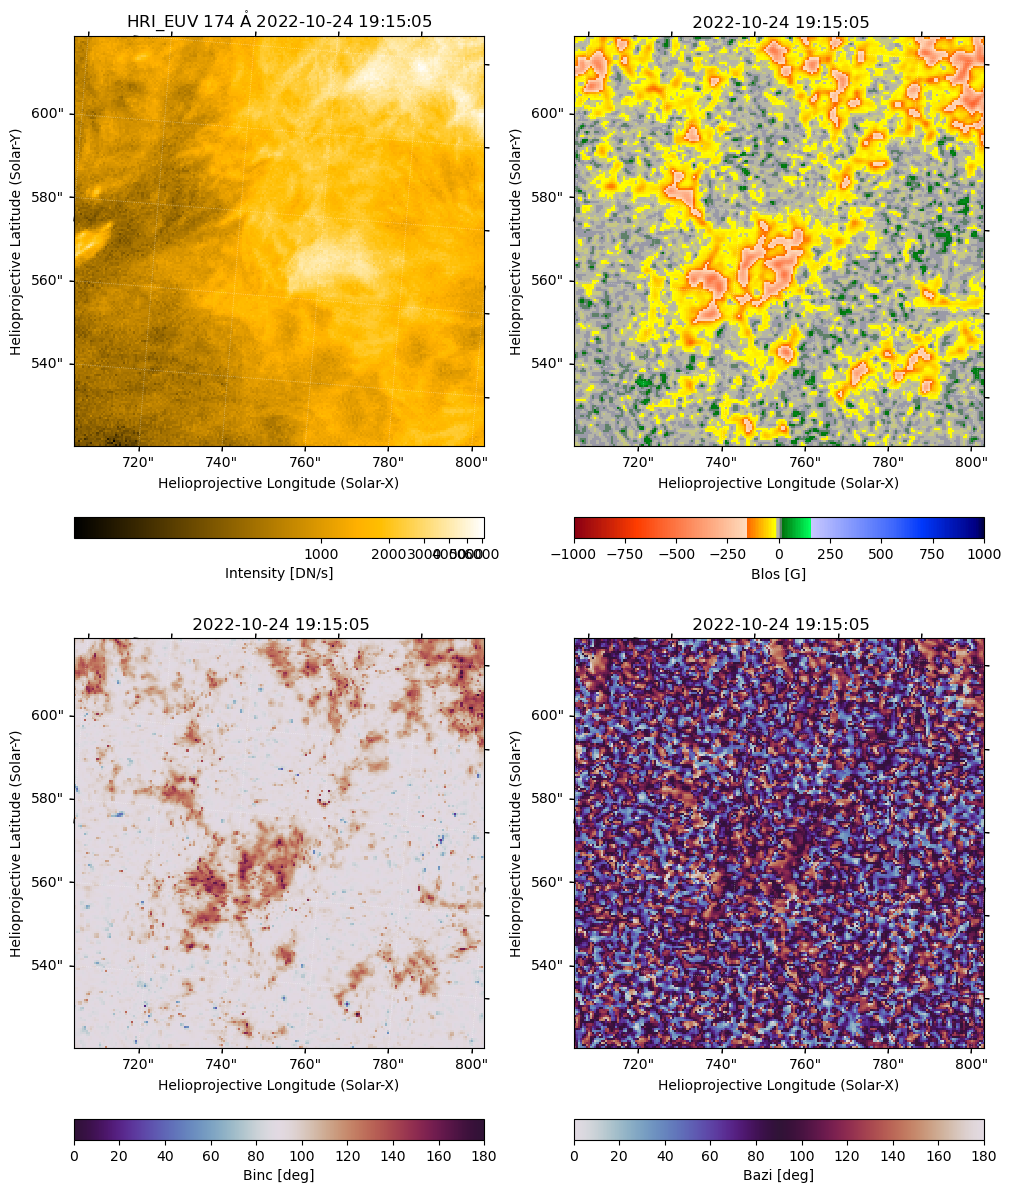

In [54]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [500, 800]*u.pix, top_right = [700, 1000]*u.pix)

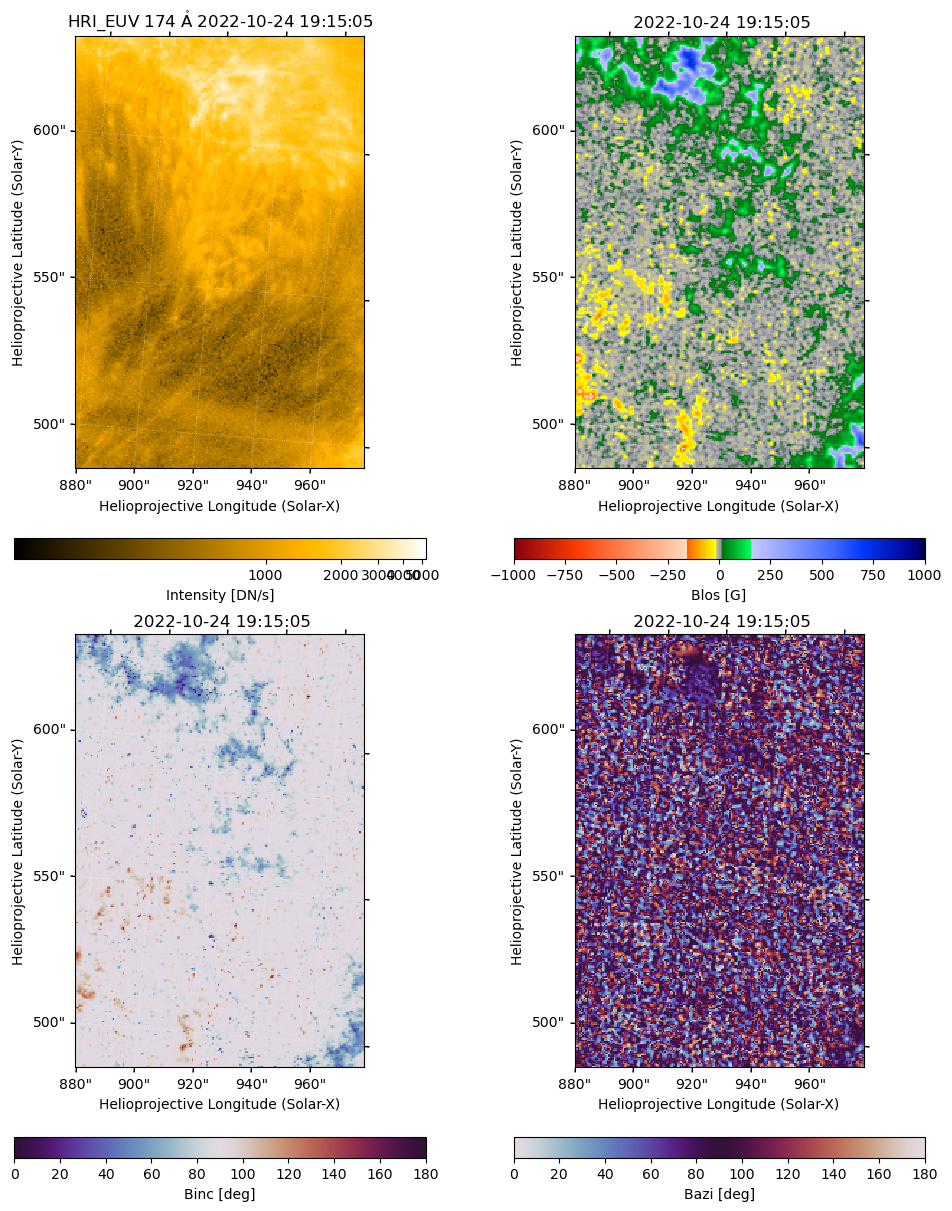

In [55]:
plot_regions([hri_174_map, phi_los_map_hri_fov, phi_binc_map_hri_fov, phi_bazi_map_hri_fov],
    bottom_left = [850, 700]*u.pix, top_right = [1050, 1000]*u.pix)